In [59]:
import sys
import numpy as np
import pandas as pd

df = pd.read_csv('data/aggregated_data.csv')
df

,STATEFIP,YEAR,ANXIETYFLG,PTSDFLG,ADHDFLG,BIPOLARFLG,DEPRESSFLG,TOT_SERVICE,POP_ESTIMATE,UTIL_RATE,...,mean_therapist near me,median_ADHD,median_PTSD,median_anxiety,median_bipolar,median_depression,median_mental hospital,median_psychiatrists near me,median_psychologist near me,median_therapist near me
0,1,2022,20178,14932,15629,11650,30545,650711,5074296,0.128237,...,56.750000,44.5,14.0,89.5,21.5,63.5,39.0,0.0,10.0,58.0
1,2,2022,1547,2955,538,415,2238,65893,733583,0.089824,...,12.416667,64.0,21.0,88.0,22.0,69.0,0.0,0.0,0.0,0.0
2,4,2022,130705,95014,44115,36904,97650,2975793,7359197,0.404364,...,71.083333,51.5,15.0,88.5,23.0,65.0,46.0,0.0,17.0,72.0
3,5,2022,8850,12711,3718,5940,17278,504337,3045637,0.165593,...,70.916667,46.5,17.0,87.0,24.0,65.0,61.5,0.0,0.0,70.5
4,6,2022,99690,100109,34247,42613,143057,4182341,39029342,0.107159,...,70.083333,48.5,14.0,91.5,20.5,66.5,54.0,2.0,13.5,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,50,2013,3379,7550,2194,2008,5422,169020,626603,0.269740,...,0.000000,21.0,11.0,50.0,21.0,61.5,0.0,0.0,0.0,0.0
438,51,2013,21422,19027,18967,29164,36816,764564,8255861,0.092609,...,0.000000,23.5,10.5,52.0,22.0,62.0,30.0,0.0,0.0,0.0
439,53,2013,18855,31489,7322,21972,49811,1025049,6966252,0.147145,...,0.000000,21.5,12.0,54.5,21.0,61.5,44.0,0.0,0.0,0.0
440,55,2013,10992,14090,5093,18133,27939,671945,5738012,0.117104,...,1.416667,22.0,9.0,51.5,21.0,66.5,45.5,0.0,0.0,0.0


In [27]:
def calcSplitRatio(df, p=36):

    ## Calculate ideal number for testing set
    test_N = (1 / np.sqrt(p)) * len(df)
    
    ## Calculate testing proportion
    test_prop = round(test_N / len(df), 2)
    
    ## Calculate training proportion
    train_prop = 1 - test_prop
    
    ## Print the results
    print(f"The ideal split ratio is {train_prop}:{test_prop} training:testing")
    
    ## Return the size of the training set proportion
    return train_prop

In [28]:
# Example usage of calcSplitRatio
train_prop = calcSplitRatio(df, p=50)
train_prop

The ideal split ratio is 0.86:0.14 training:testing


0.86

In [31]:
correlation_matrix

,STATEFIP,YEAR,ANXIETYFLG,PTSDFLG,ADHDFLG,BIPOLARFLG,DEPRESSFLG,TOT_SERVICE,POP_ESTIMATE,UTIL_RATE,...,mean_therapist near me,median_ADHD,median_PTSD,median_anxiety,median_bipolar,median_depression,median_mental hospital,median_psychiatrists near me,median_psychologist near me,median_therapist near me
STATEFIP,1.000000,-0.027950,-0.037629,-0.057133,-0.034759,-0.030286,-0.078372,-0.058365,-0.075253,0.017575,...,-0.052360,-0.049961,-0.096189,-0.079723,-0.213084,-0.109259,-0.070828,-0.071352,0.017938,-0.054411
YEAR,-0.027950,1.000000,0.225068,0.129937,0.016196,-0.136469,0.059074,0.049973,0.005967,0.119393,...,0.867700,0.749856,0.618010,0.918571,-0.095780,-0.114978,0.227833,0.167187,0.586272,0.849372
ANXIETYFLG,-0.037629,0.225068,1.000000,0.923360,0.849408,0.656293,0.874737,0.800796,0.476129,0.413490,...,0.323209,0.184439,0.063836,0.263715,-0.090158,-0.006375,0.320363,0.070127,0.418406,0.326414
PTSDFLG,-0.057133,0.129937,0.923360,1.000000,0.873065,0.757837,0.941207,0.902237,0.577584,0.378508,...,0.246208,0.084882,0.020635,0.179934,-0.086524,-0.028739,0.292102,0.112516,0.399080,0.251837
ADHDFLG,-0.034759,0.016196,0.849408,0.873065,1.000000,0.835763,0.908944,0.883626,0.546632,0.314923,...,0.142352,-0.010915,-0.145962,0.058947,-0.088389,-0.015502,0.236173,0.098747,0.338798,0.149122
BIPOLARFLG,-0.030286,-0.136469,0.656293,0.757837,0.835763,1.000000,0.887590,0.874180,0.768208,0.095544,...,0.011032,-0.107696,-0.247184,-0.113132,-0.037269,-0.078856,0.235895,0.084437,0.229861,0.018117
DEPRESSFLG,-0.078372,0.059074,0.874737,0.941207,0.908944,0.887590,1.000000,0.957220,0.713501,0.270188,...,0.187634,0.020478,-0.105151,0.103691,-0.094013,-0.032654,0.292039,0.104829,0.367759,0.193963
TOT_SERVICE,-0.058365,0.049973,0.800796,0.902237,0.883626,0.874180,0.957220,1.000000,0.724180,0.296693,...,0.177714,0.010867,-0.116317,0.096793,-0.075724,-0.044036,0.260622,0.145036,0.372015,0.184092
POP_ESTIMATE,-0.075253,0.005967,0.476129,0.577584,0.546632,0.768208,0.713501,0.724180,1.000000,-0.225248,...,0.147943,-0.039081,-0.203811,0.032871,-0.086193,-0.087497,0.311764,0.217898,0.381582,0.154204
UTIL_RATE,0.017575,0.119393,0.413490,0.378508,0.314923,0.095544,0.270188,0.296693,-0.225248,1.000000,...,0.064253,0.095342,0.259573,0.148584,0.028881,0.054620,-0.111285,-0.102224,-0.067104,0.064427


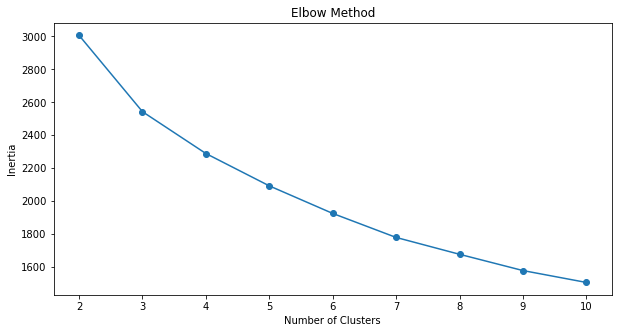

In [67]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


#Feature Selection
features = ['UTIL_RATE', 'median_anxiety', 'median_depression', 'median_PTSD', 'median_ADHD', 'median_bipolar', 
           'max_psychiatrists near me','max_therapist near me', 'max_mental hospital']  # Replace with your actual column names
X = df[features]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine Optimal k
inertia = []
silhouette_scores = []
k_range = range(2, 11)  # Testing from 2 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

          STATEFIP         YEAR    ANXIETYFLG       PTSDFLG       ADHDFLG  \
Cluster                                                                     
0        31.442857  2014.507143  16888.178571  19429.550000  13167.607143   
1        28.292079  2017.846535  25145.019802  24216.693069  13295.094059   
2        28.710000  2021.390000  32874.760000  28057.240000  13245.800000   

           BIPOLARFLG    DEPRESSFLG    TOT_SERVICE  POP_ESTIMATE  UTIL_RATE  \
Cluster                                                                       
0        21540.178571  34329.735714  930947.042857  7.470637e+06   0.145030   
1        14928.816832  35398.905941  907107.173267  6.216696e+06   0.178497   
2        14313.410000  37933.120000  995689.420000  6.555555e+06   0.191271   

         ...  mean_therapist near me  median_ADHD  median_PTSD  \
Cluster  ...                                                     
0        ...                2.697024    20.846429    10.671429   
1        ...        

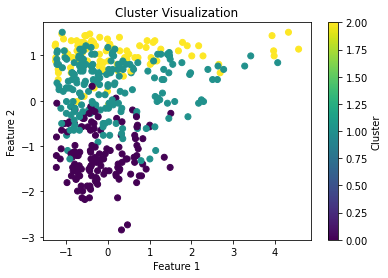

In [68]:
# Fit K-means with Optimal Clusters
optimal_k = 3  # Replace with the number of clusters determined
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add Clusters to Original DataFrame
df['Cluster'] = clusters

# Analyze Clusters
print(df.groupby('Cluster').mean())  # Check the mean values of features in each cluster

# Visualize Clusters 
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.title('Cluster Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()


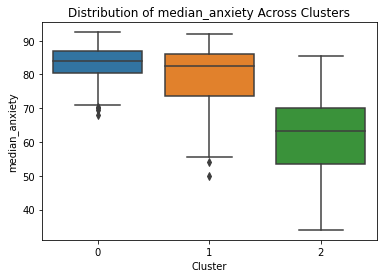

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

#Visualize the distribution of a key feature across clusters
sns.boxplot(x='Cluster', y='median_anxiety', data=df_with_clusters) #can use diff features to compare
plt.title(f"Distribution of {feature} Across Clusters")
plt.show()

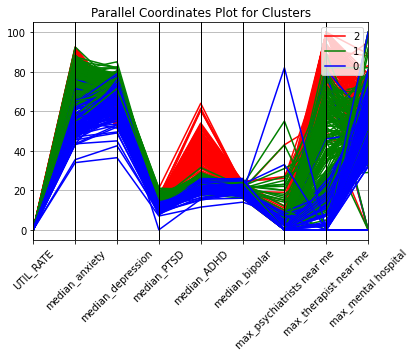

In [70]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(df, class_column='Cluster', cols=features, color=['r', 'g', 'b'])
plt.title('Parallel Coordinates Plot for Clusters')
plt.xticks(rotation=45)
plt.show()

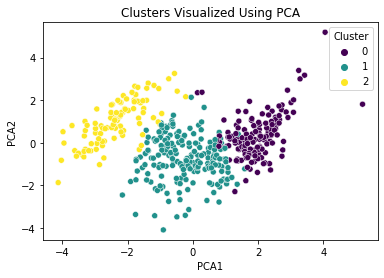

      UTIL_RATE  median_anxiety  median_depression  median_PTSD  median_ADHD  \
PCA1  -0.130603       -0.522220           0.005762    -0.434413    -0.460884   
PCA2  -0.173469       -0.047848          -0.698258    -0.318743     0.189123   

      median_bipolar  max_psychiatrists near me  max_therapist near me  \
PCA1       -0.066442                  -0.079825              -0.503917   
PCA2       -0.511705                   0.052883               0.272746   

      max_mental hospital  
PCA1            -0.210592  
PCA2            -0.060508  


In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA to DataFrame
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Visualize
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters Visualized Using PCA')
plt.show()

# Print feature contributions to PCA components
print(pd.DataFrame(pca.components_, columns=features, index=['PCA1', 'PCA2']))


In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance

# Train a decision tree to predict clusters
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_scaled, kmeans.labels_)

# Get feature importances
importances = clf.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(importance_df)


                     Feature  Importance
4                median_ADHD    0.394393
1             median_anxiety    0.338189
2          median_depression    0.097460
3                median_PTSD    0.059066
8        max_mental hospital    0.036586
5             median_bipolar    0.025874
7      max_therapist near me    0.022396
6  max_psychiatrists near me    0.016603
0                  UTIL_RATE    0.009432


   UTIL_RATE  median_anxiety  median_depression  median_PTSD  median_ADHD  \
0  -0.209504       -1.180399          -0.417635    -0.982980    -0.630420   
1   0.062715        0.321190           0.702665     0.396501    -0.360164   
2   0.166621        1.003755          -0.834695     0.575241     1.610119   

   median_bipolar  max_psychiatrists near me  max_therapist near me  \
0       -0.045969                  -0.210711              -0.939406   
1        0.045499                   0.060313              -0.024445   
2       -0.027550                   0.173163               1.364547   

   max_mental hospital  
0            -0.477700  
1             0.121036  
2             0.424288  


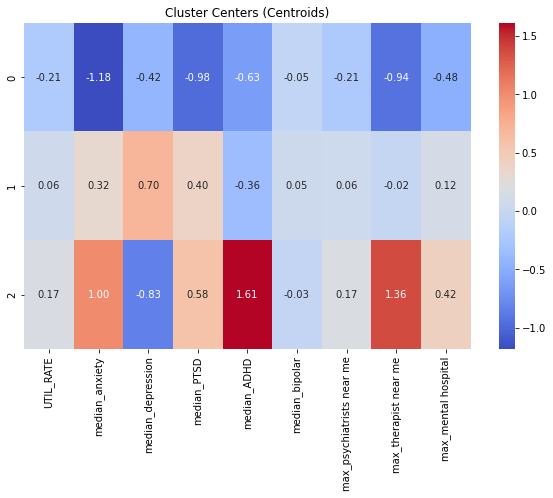

In [93]:
import pandas as pd

# Assuming `kmeans` is your fitted K-means model
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features)

# Display cluster centers (features for each cluster)
print(cluster_centers)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap of cluster centers
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cluster Centers (Centroids)')
plt.show()


In [94]:
for i in range(len(cluster_centers)):
    print(f"Top features for Cluster {i}:")
    print(cluster_centers.iloc[i].sort_values(ascending=False).head(5))  # Top 5 features
    print()


Top features for Cluster 0:
median_bipolar              -0.045969
UTIL_RATE                   -0.209504
max_psychiatrists near me   -0.210711
median_depression           -0.417635
max_mental hospital         -0.477700
Name: 0, dtype: float64

Top features for Cluster 1:
median_depression      0.702665
median_PTSD            0.396501
median_anxiety         0.321190
max_mental hospital    0.121036
UTIL_RATE              0.062715
Name: 1, dtype: float64

Top features for Cluster 2:
median_ADHD              1.610119
max_therapist near me    1.364547
median_anxiety           1.003755
median_PTSD              0.575241
max_mental hospital      0.424288
Name: 2, dtype: float64

